# Análise de Dados Financeiros com Python

# Bibliotecas importadas

In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Obtenção dos dados

In [62]:
ticker = 'AAPL'
start = '2020-01-27'
end = '2021-01-27'

In [63]:
data = yf.download(
    tickers=ticker, 
    start=start, 
    end=end, 
    progress=False
)

In [64]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,75.898651,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.045776,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,79.679451,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,79.563995,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.036217,199588400


In [65]:
data.to_csv('data/aapl.csv')

Cálculo do preço de fechamento normalizado

In [66]:
norm = data['Close'] / data['Close'].iloc[0]

In [67]:
norm

Date
2020-01-27    1.000000
2020-01-28    1.028289
2020-01-29    1.049814
2020-01-30    1.048293
2020-01-31    1.001813
                ...   
2021-01-20    1.709403
2021-01-21    1.772067
2021-01-22    1.800550
2021-01-25    1.850396
2021-01-26    1.853504
Name: Close, Length: 253, dtype: float64

In [68]:
data['Daily Chg'] = data['Close'] - data['Open']
data['Normalized'] = norm

In [69]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Chg,Normalized
Date,,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,75.898651,161940000,-0.277496,1.000000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.045776,162234000,1.272499,1.028289
2020-01-29,81.112503,81.962502,80.345001,81.084999,79.679451,216229200,-0.027504,1.049814
2020-01-30,80.135002,81.022499,79.687500,80.967499,79.563995,126743200,0.832497,1.048293
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.036217,199588400,-2.854996,1.001813


## Visualizações gráficas

In [58]:
datetime.strftime(data.index[0], "%d/%m/%Y")

'27/01/2020'

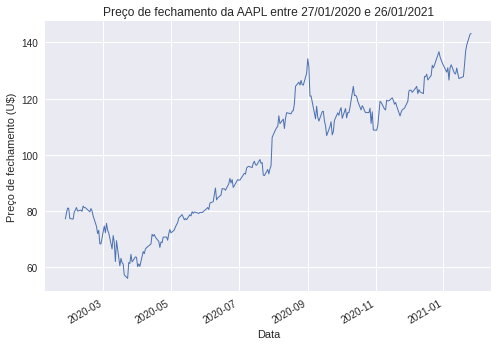

In [70]:
fig, ax =  plt.subplots()
data['Close'].plot(ax=ax, lw=1)
ax.set_title(f'Preço de fechamento da {ticker} entre {dt.datetime.strftime(data.index[0], "%d/%m/%Y")} e {dt.datetime.strftime(data.index[-1], "%d/%m/%Y")}')
ax.set_ylabel('Preço de fechamento (U$)')
ax.set_xlabel('Data')
plt.show()

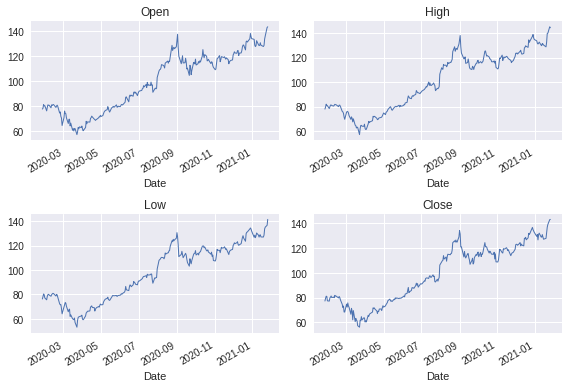

In [71]:
fig, ax =  plt.subplots(2,2)
data['Open'].plot(ax=ax[0,0], lw=1, title='Open')
data['High'].plot(ax=ax[0,1], lw=1, title='High')
data['Low'].plot(ax=ax[1,0], lw=1, title='Low')
data['Close'].plot(ax=ax[1,1], lw=1, title='Close')
plt.tight_layout()
plt.show()

## Obtençãod de dados financeiros com pandas-datareader

In [81]:
ticker = 'AAPL'
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 12, 31)

data = pdr.get_data_yahoo(ticker, start, end)

In [82]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.221355
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.414242
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.883358
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.803490
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.486008


In [83]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.802353
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.480576
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.676666
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.536850
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.515961


## Cálculos simples

* Retorno simples
* Retorno Logarítmico
* Desvio padrão (volatilidade)
* Móveis
    * Média móvel simples
    * Média móvel exponencial
    
 

## Desvio Padrão

* $\sigma_p = \sigma_{daily} \times \sqrt{p}$

* \sigma_{annually} = \sigma_{daily} \times \sqrt{252}


In [86]:
data = pd.read_csv('data/aapl.csv', index_col=0, parse_dates=True)

In [87]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,75.898651,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.045776,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,79.679451,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,79.563995,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.036217,199588400


In [88]:
data['pct_chg'] = data['Close'].pct_change()

In [90]:
data['Log Returns'] = np.log(data['Close']) - np.log(data['Close'].shift())

In [91]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_chg,Log Returns
Date,,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,75.898651,161940000,NaN,NaN
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.045776,162234000,0.028289,0.027897
2020-01-29,81.112503,81.962502,80.345001,81.084999,79.679451,216229200,0.020932,0.020716
2020-01-30,80.135002,81.022499,79.687500,80.967499,79.563995,126743200,-0.001449,-0.001450
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.036217,199588400,-0.044339,-0.045352


In [92]:
volatility = data['Log Returns'].std() * 252 ** .5
volatility

0.4724126576908501

Text(0.5, 1.0, 'AAPL volatility:  47.24%')

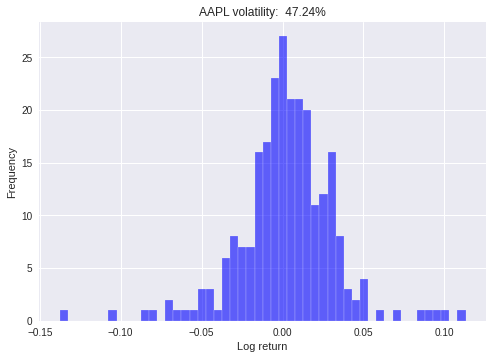

In [100]:
fig, ax = plt.subplots()

data['Log Returns'].hist(
    ax = ax,
    bins = 50,
    alpha = .60,
    color = 'blue',
    edgecolor = 'white'
)

ax.set_xlabel('Log return')
ax.set_ylabel('Frequency')
ax.set_title(f'{ticker} volatility: {100 * volatility: 5.2f}%')

### Média móvel

In [104]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA20'] = data['Close'].rolling(20).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,pct_chg,Log Returns,MA10,MA20
Date,,,,,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,130.861801,104319500,0.032856,0.032328,129.415000,130.779000
2021-01-21,133.800003,139.669998,133.589996,136.869995,135.658997,120150900,0.036658,0.036002,130.442000,131.211000
2021-01-22,136.279999,139.850006,135.020004,139.070007,137.839523,114459400,0.016074,0.015946,131.257001,131.570501
2021-01-25,143.070007,145.089996,136.539993,142.919998,141.655441,157611700,0.027684,0.027308,132.344000,132.168500
2021-01-26,143.600006,144.300003,141.369995,143.160004,141.893341,98390600,0.001679,0.001678,133.762001,132.728000


In [109]:
data['EM10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EM20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [110]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,pct_chg,Log Returns,MA10,MA20,EM10,EM20
Date,,,,,,,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,130.861801,104319500,0.032856,0.032328,129.415000,130.779000,129.703820,129.199030
2021-01-21,133.800003,139.669998,133.589996,136.869995,135.658997,120150900,0.036658,0.036002,130.442000,131.211000,131.006761,129.929598
2021-01-22,136.279999,139.850006,135.020004,139.070007,137.839523,114459400,0.016074,0.015946,131.257001,131.570501,132.472806,130.800114
2021-01-25,143.070007,145.089996,136.539993,142.919998,141.655441,157611700,0.027684,0.027308,132.344000,132.168500,134.372295,131.954388
2021-01-26,143.600006,144.300003,141.369995,143.160004,141.893341,98390600,0.001679,0.001678,133.762001,132.728000,135.970060,133.021590


<AxesSubplot:xlabel='Date'>

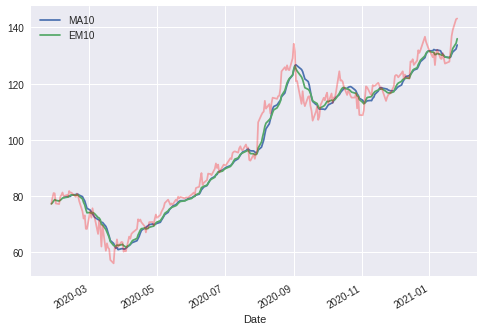

In [120]:
fig, ax = plt.subplots()
data[['MA10', 'EM10']].plot(ax=ax)
data['Close'].plot(ax = ax, alpha = .3, color='r')

## Moving Average Convergence Divergence (MACD)

* MACD = 12-Period EMA - 26-Period EMA
* Signal line 9-Period EMA of MACD

In [122]:
data = pd.read_csv('data/aapl.csv', index_col=0, parse_dates=True)

In [123]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()

data['MACD'] = exp1 - exp2

In [124]:
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [125]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
Date,,,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,130.861801,104319500,1.168345,1.733879
2021-01-21,133.800003,139.669998,133.589996,136.869995,135.658997,120150900,1.653950,1.717893
2021-01-22,136.279999,139.850006,135.020004,139.070007,137.839523,114459400,2.191061,1.812527
2021-01-25,143.070007,145.089996,136.539993,142.919998,141.655441,157611700,2.894027,2.028827
2021-01-26,143.600006,144.300003,141.369995,143.160004,141.893341,98390600,3.430948,2.309251


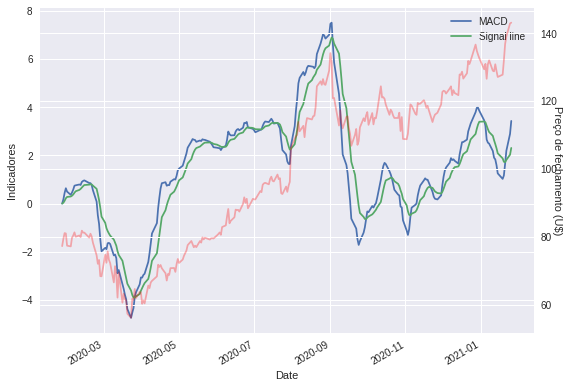

In [143]:
fig, ax = plt.subplots()
data['Close'].plot(ax = ax, alpha=0.3, secondary_y=True, color='r')
data[['MACD', 'Signal line']].plot(ax = ax, ylabel='Indicadores').legend(loc='upper right')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (U$)', rotation=-90)
plt.tight_layout()
plt.show()

## Oscilador estocástico

In [149]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()

data['%K'] = (data['Close'] - low14)*100 / (high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [150]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,130.861801,104319500,1.168345,1.733879,58.792890,25.533723
2021-01-21,133.800003,139.669998,133.589996,136.869995,135.658997,120150900,1.653950,1.717893,78.931506,49.802854
2021-01-22,136.279999,139.850006,135.020004,139.070007,137.839523,114459400,2.191061,1.812527,94.209367,77.311254
2021-01-25,143.070007,145.089996,136.539993,142.919998,141.655441,157611700,2.894027,2.028827,88.401933,87.180935
2021-01-26,143.600006,144.300003,141.369995,143.160004,141.893341,98390600,3.430948,2.309251,89.684699,90.765333


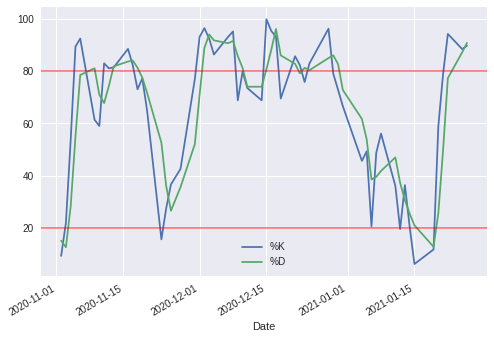

In [156]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2020-11-01':].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.5)
ax.axhline(20, c='r', alpha=0.5)